In [2]:
import yt
print(yt.__version__) # 3.6.0 or higher
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment
import os
print(os.getcwd())

3.6.0
C:\Users\semvi\Documents\CMAA\output_backup


## Plot a single image

In [3]:
datfile = './output_I/turbulence_0100.dat'
ds = yt.load(datfile)
ad = ds.all_data()

yt : [INFO     ] 2020-11-29 14:55:15,765 Parameters: current_time              = 75.0
yt : [INFO     ] 2020-11-29 14:55:15,766 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:55:15,766 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:55:15,766 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:55:15,767 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2020-11-29 14:55:21,971 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 14:55:23,104 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:55:23,105 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:55:23,107 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:55:23,107 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:55:23,109 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800
yt : [WARNING  ] 2020-11-29 14:55:23,939 Plot image for field ('amrvac', 'm1') has both positive and negative values. Min = -1.019986, Max = 5.151782.
yt : [WARNING  ] 2020-11-29 14:55:23,940 Switching to symlog colorbar scaling unless linear scaling is specified later
C:\Users\semvi\anaconda3\lib\site-packages\yt\visualization\base_plot_types.py:220: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLog


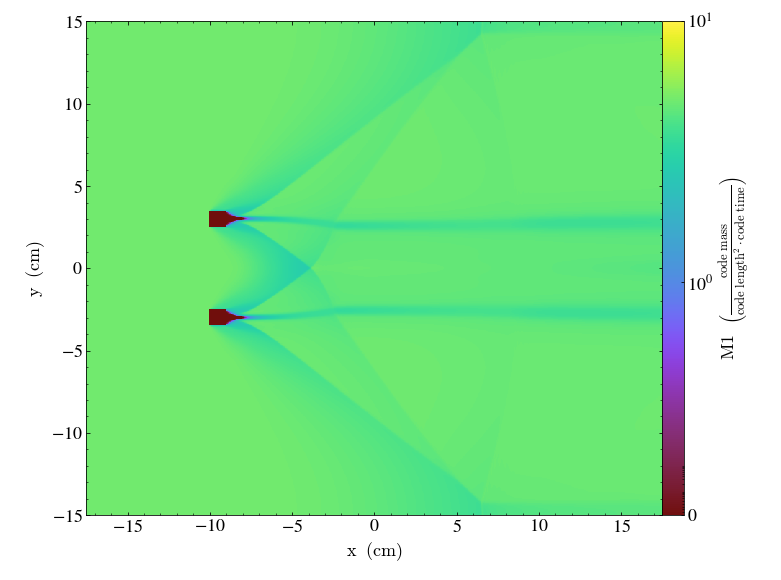

In [4]:
p = yt.plot_2d(ds, 'm1')
p.set_zlim('m1', 0, 10)
p.show()

## Plot the average velocity

### Axis 0

yt : [INFO     ] 2020-11-29 14:55:49,127 Parameters: current_time              = 150.0
yt : [INFO     ] 2020-11-29 14:55:49,128 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:55:49,129 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:55:49,129 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:55:49,130 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-29 14:55:49,534 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 14:55:50,881 Parameters: current_time              = 150.75
yt : [INFO     ] 2020-11-29 14:55:50,882 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:55:50,884 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:55:50,887 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:55:50,888 Parameters: cosmological_simula

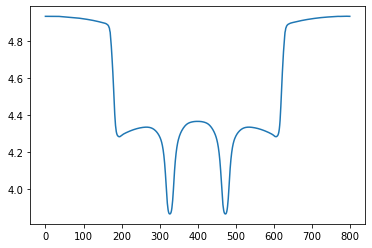

In [7]:
ts = yt.load("./output_I/*.dat")

data = 'm1'
BEGIN = 200
NUM = 10

total = None
for ds in ts[BEGIN:BEGIN+NUM]:
    all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)

    profile = np.squeeze(all_data_level_0[data])[-10,:]
    if total is None:
        total = profile
    else:
        total += profile
        
total /= len(ts[BEGIN:BEGIN+NUM])

plt.plot(total)
plt.show()



### Axis 1

yt : [INFO     ] 2020-11-29 14:56:09,304 Parameters: current_time              = 150.0
yt : [INFO     ] 2020-11-29 14:56:09,305 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:56:09,306 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:56:09,306 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:56:09,307 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-29 14:56:09,741 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 14:56:11,075 Parameters: current_time              = 150.75
yt : [INFO     ] 2020-11-29 14:56:11,076 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:56:11,078 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:56:11,079 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:56:11,081 Parameters: cosmological_simula

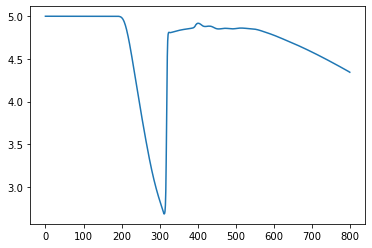

In [8]:
ts = yt.load("./output_I/*.dat")

data = 'm1'
NUM = 50

total = None
for ds in ts[200:200+NUM]:
    all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

    squeezed = np.squeeze(all_data_level_0[data])
    profile = squeezed[:,squeezed.shape[1]//2]
    if total is None:
        total = profile
    else:
        total += profile
        
total /= len(ts[200:200+NUM])

plt.plot(total)
plt.show()


## Plot slices along the various axes

average along y axis:
[5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         

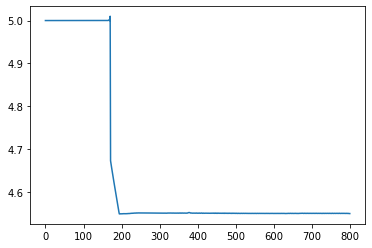

---
skewness along y axis:
[ 1.89175293e-45 -1.07899982e-45 -4.55422001e-47 -3.85006753e-45
  7.63532501e-45 -2.91645243e-45  8.37275832e-46  6.25679764e-45
  7.70889318e-45  6.57559304e-45  1.05482742e-44  2.72797779e-44
  1.63461466e-44  3.89490908e-44  2.18655109e-44 -7.58627956e-45
  6.45473105e-45 -1.52373692e-44  3.77755034e-44  1.03641786e-43
  7.74497661e-44  9.93047673e-44  1.06638813e-44  3.56753073e-44
  1.65528381e-45  3.35085495e-44  1.62571641e-43  2.14799787e-43
  1.27427076e-43 -4.38361192e-44  1.30220915e-43  9.68717628e-44
  1.49541317e-43  9.97321633e-44  1.10891754e-43  1.69560617e-43
  9.78316523e-44  1.83526308e-43  3.29704509e-43  4.07558900e-43
  2.91951777e-43  2.95980510e-43  2.96134653e-43  2.07357140e-43
  1.10022949e-43  2.04869835e-43  3.10774719e-43  3.52037703e-43
  3.57495761e-43  2.25446152e-43  2.86190689e-43  4.49678429e-43
  5.60559673e-43  4.20925536e-43  4.14067932e-43  3.68462673e-43
  2.17409705e-43  3.80671486e-43  5.09433299e-43  3.69809671e-4

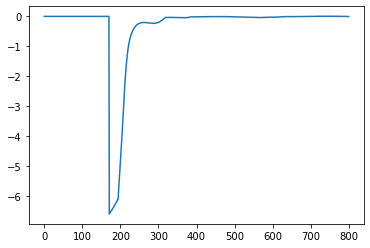

---



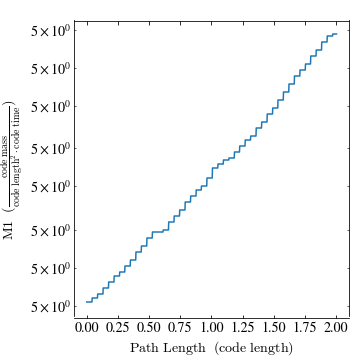

In [10]:
all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

print('average along y axis:')

print(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.plot(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.show()
print('---')


print('skewness along y axis:')
print(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.plot(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.show()
print('---')


p = yt.LinePlot(ds, ['m1'], (0, 0.5, 0), (2, 0.5, 0), 1000)
p.show()

In [18]:
p = yt.SlicePlot(ds, 'y', 'm1')
p.show()

yt : [INFO     ] 2020-11-29 15:14:41,513 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,514 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,515 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,517 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,519 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800


KeyboardInterrupt: 

yt : [INFO     ] 2020-11-29 14:58:53,477 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,478 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,481 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800
yt : [WARNING  ] 2020-11-29 14:58:54,282 Plot image for field ('amrvac', 'm1') has both positive and negative values. Min = -0.915418, Max = 5.154242.
yt : [WARNING  ] 2020-11-29 14:58:54,283 Switching to symlog colorbar scaling unless linear scaling is specified later
C:\Users\semvi\anaconda3\lib\site-packages\yt\visualization\base_plot_types.py:220: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(



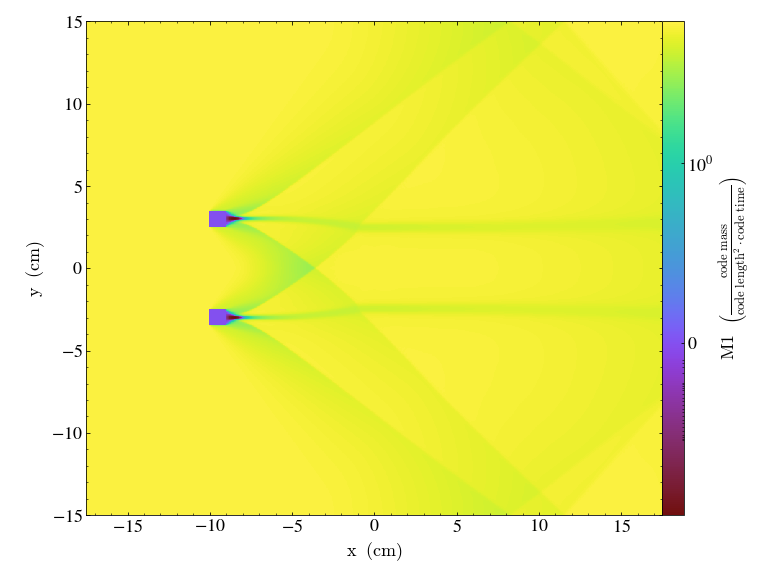

In [13]:
p = yt.SlicePlot(ds, 'z', 'm1')
p.show()

## Energy spectrum of Y at X = 26

TODO
* also use m2?
* average/filter data
* plot dashed lines

yt : [INFO     ] 2020-11-29 18:19:40,953 Parameters: current_time              = 171.75
yt : [INFO     ] 2020-11-29 18:19:40,955 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 18:19:40,957 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 18:19:40,960 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 18:19:40,962 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-29 18:19:42,401 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 18:19:45,112 Parameters: current_time              = 172.5
yt : [INFO     ] 2020-11-29 18:19:45,116 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 18:19:45,119 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 18:19:45,120 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 18:19:45,123 Parameters: cosmological_simula

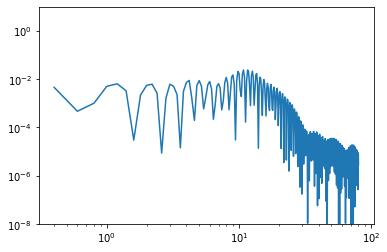

yt : [INFO     ] 2020-11-29 18:19:53,716 Parameters: current_time              = 179.25
yt : [INFO     ] 2020-11-29 18:19:53,718 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 18:19:53,720 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 18:19:53,725 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 18:19:53,727 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-29 18:19:55,215 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 18:19:58,062 Parameters: current_time              = 180.0
yt : [INFO     ] 2020-11-29 18:19:58,065 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 18:19:58,066 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 18:19:58,066 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 18:19:58,075 Parameters: cosmological_simula

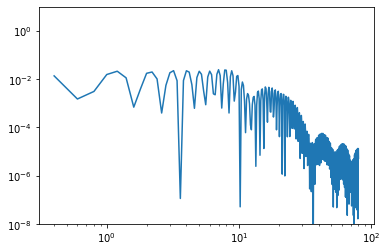

yt : [INFO     ] 2020-11-29 18:20:06,117 Parameters: current_time              = 186.75
yt : [INFO     ] 2020-11-29 18:20:06,121 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 18:20:06,121 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 18:20:06,126 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 18:20:06,130 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-29 18:20:07,343 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 18:20:09,872 Parameters: current_time              = 187.5
yt : [INFO     ] 2020-11-29 18:20:09,874 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 18:20:09,876 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 18:20:09,877 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 18:20:09,881 Parameters: cosmological_simula

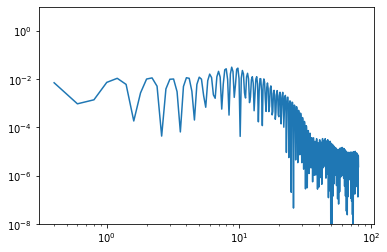

In [102]:
ts = yt.load("./output_I/*.dat")
data = 'm1'
U_in = 5
dt = 0.75
X, X_max = 26, 35
X_index = int( 800 * X / X_max)

for I in [230, 240, 250]:
    ds = ts[I-1]
    # central difference
    sl = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)[data])[X_index,:]
    ds = ts[I]
    sl = -sl + 2* np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)[data])[X_index,:]
    ds = ts[I+1]
    sl = sl - np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)[data])[X_index,:]
    sl /= 2*dt

    fourier = np.fft.fft(sl)
    e = np.square(np.absolute(fourier))
    f = np.linspace(0.2, e.size/U_in, e.size) # scale x-axis values
    plt.loglog(f[1:f.size//2],e[1:f.size//2])
    plt.ylim(1e-8, 1e1)
    plt.show()
